# Yulu Bike-Sharing EDA Case Study

🔍 An exploratory analysis of Yulu's ride-sharing data to uncover usage trends, peak demand hours, and key factors influencing ride duration.

## Project Objectives
- Analyze ride durations and user behavior
- Identify peak hours and most-used bikes
- Examine station-level demand patterns
- Support operational efficiency and fleet planning

## Dataset Loading
Make sure the ride data CSV is available in the working directory. If running in Colab, upload the file when prompted.

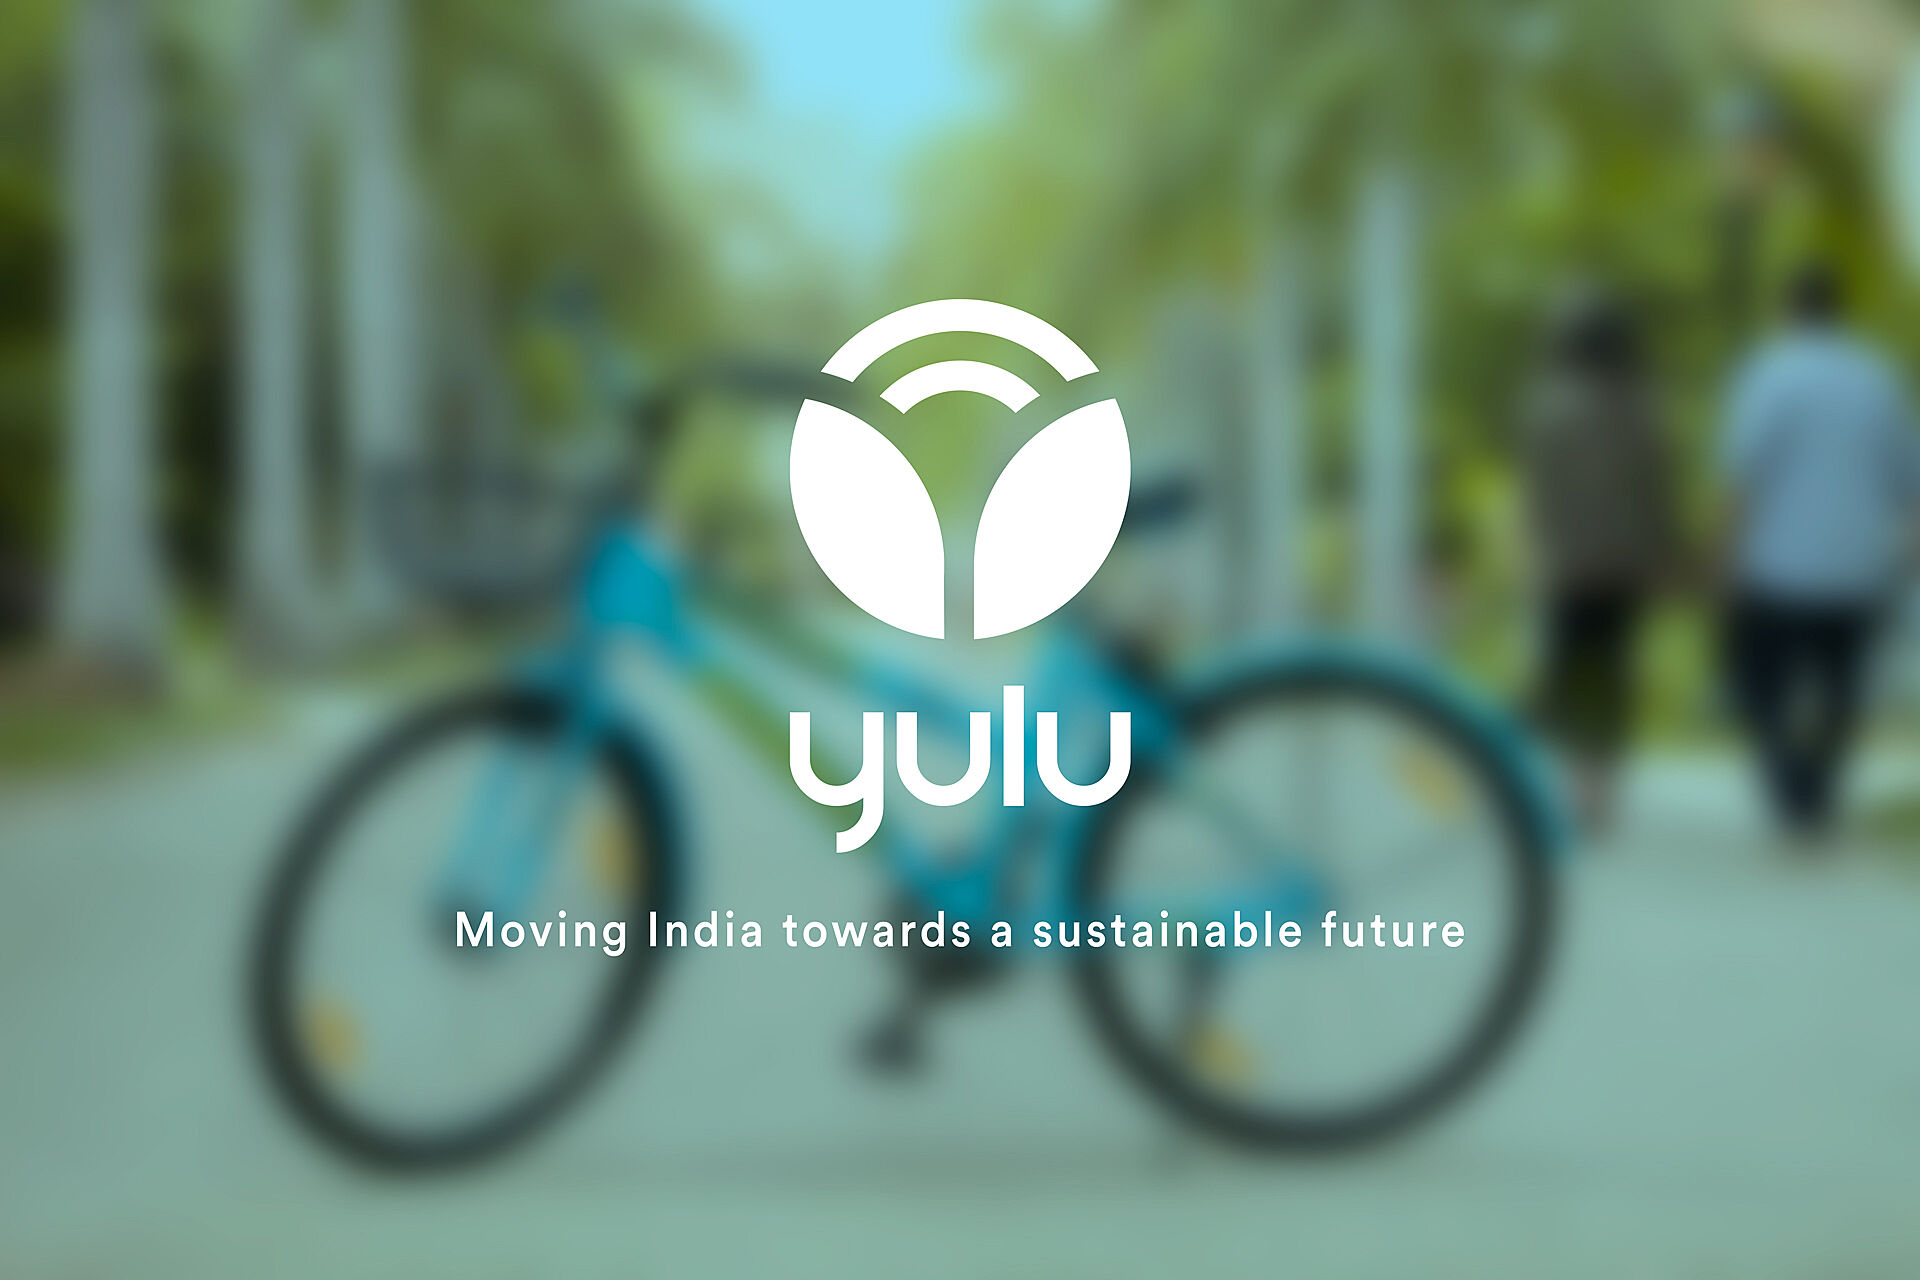

In today's rapidly urbanizing world, micro-mobility solutions play a crucial role in addressing last-mile connectivity challenges. **Yulu**, India's leading micro-mobility service provider, offers shared electric cycles to facilitate sustainable and convenient commuting. With the increasing demand for eco-friendly transport options, **Yulu** has positioned itself as a key player in the shared mobility sector.Starting off as a mission to eliminate traffic congestion in India, **Yulu** provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.


Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

**PROBLEM STATEMENT:**

Yulu seeks to identify the key variables that impact the demand for its shared electric cycles in the Indian market.
The objective is
  - To determine the most significant factors influencing ridership patterns.
  - Assess how well these variables explain fluctuations in demand.

**GOAL:**
By leveraging data-driven insights, Yulu aims to
- Refine its business strategy
- Optimize fleet distribution
- Improve customer experience to regain market growth.

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# IMPORTING DATASET and READING THE FILE

!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089" -O yulu.csv
df = pd.read_csv("yulu.csv")

# **DATASET DESCRIPTION AND PRELIMINARY DATA ANALYSIS**

In [ ]:
# A GLIMPSE OF THE YULU DATASET

df.head(5)

In [ ]:
# SHAPE OF THE DATASET - NO OF ROWS AND COLUMNS

print("Finding the shape of Dataset using 'df.shape'")
print("-----------------------------------------------")
print("No of Rows =", df.shape[0])
print("No of Columns =", df.shape[1])

In [ ]:
# NAME OF COLUMNS AND THEIR DATATYPE

df.info()

In [ ]:
df.columns

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

<font color = 'blue'>CATEGORICAL COLUMNS :<font>

- season
- holiday
- workingday
- weather

In [ ]:
# CONVERSION OF CATEGORICAL ATTRIBUTES TO 'CATEGORY'

cat_cols = ["season","holiday","workingday","weather"]
df[cat_cols] = df[cat_cols].astype("category")
df.info()

In [ ]:
df.describe(include= "category").T

**1. Season**  
- **Unique values:** 4 → **Spring, Summer, Fall, Winter**.  
- **Most frequent season (`top`):** 4 (Winter, assuming coding is 1=Spring, 2=Summer, etc.)  
- **Frequency (`freq`):** **2,734 instances (~25%)** of rentals occurred in this season.  

**2. Holiday**  
- **Unique values:** 2 → 0 = Not a holiday, 1 = Holiday.  
- **Most frequent (`top`):** 0 (Not a holiday).  
- **Frequency (`freq`):** **10,575 instances (~97%)** are on non-holidays.  
  
**3. Working Day**  
- **Unique values:** 2 → 0 = Weekend/Holiday, 1 = Working Day.  
- **Most frequent (`top`):** 1 (Working Day).  
- **Frequency (`freq`):** **7,412 instances (~68%)** are on working days.  

**4. Weather**  
- **Unique values:** 4 → 1=Clear, 2=Cloudy, 3=Rainy, 4=Stormy.  
- **Most frequent (`top`):** 1 (Clear weather).  
- **Frequency (`freq`):** **7,192 instances (~66%)** occur in clear weather.  


In [ ]:
# DESCRIPTIVE STATISTICS SUMMARY OF THE GIVEN DATAFRAME

df.describe().T

**Observations: Numerical Statistics**  

**1. Temperature (`temp`)**  
- **Mean:** **20.23°C**  
- **Std Dev:** **7.79°C** → Moderate variation.  
- **Range:** **0.82°C (min) to 41°C (max).**  

**2. Feels-like Temperature (`atemp`)**  
- **Mean:** **23.65°C** (Slightly higher than actual temperature).  
- **Std Dev:** **8.47°C** → Slightly more variation than actual temp.  
- **Range:** **0.76°C to 45.45°C.**  


**3. Humidity (`humidity`)**  
- **Mean:** **61.89%**  
- **Std Dev:** **19.25%** → Large variation in humidity levels.  
- **Range:** **0% (min) to 100% (max).**  

**4. Wind Speed (`windspeed`)**  
- **Mean:** **12.80 km/h**  
- **Std Dev:** **8.16 km/h** → Significant variation.  
- **Range:** **0 to 56.99 km/h.**  

**5. Casual Users (`casual`)**  
- **Mean:** **36.02 users.**  
- **Std Dev:** **49.96** → High variability.  
- **Range:** **0 to 367 users.**  


**6. Registered Users (`registered`)**  
- **Mean:** **155.55 users.**  
- **Std Dev:** **151.03** → Also highly variable.  
- **Range:** **0 to 886 users.**  

**7. Total Bike Rentals (`count`)**  
- **Mean:** **191.57 rentals.**  
- **Std Dev:** **181.14** → Huge variability.  
- **Range:** **1 to 977 rentals.**  


In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

**Observations:**
- Data Quality is Good
  - The dataset is clean with **no missing values or duplicates.**
- Ensures Reliable Statistical Analysis
  - Since no data is missing, we can directly proceed with statistical tests, Hypothesis testing, and visualizations without preprocessing concerns.


# **DISTRIBUTION OF NUMERICAL VARIABLES**

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
colors = ["skyblue","lightgreen","brown","orange"]
num_cols = ["temp", "atemp", "humidity", "windspeed"]
for idx,coln in enumerate(num_cols):
  sns.histplot(df[coln],kde=True, color=colors[idx],  bins=30, edgecolor="black", alpha=0.7,ax=axes[idx] )
  axes[idx].set_title(f"Distribution of {coln}", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=True)
colors = ["skyblue","orange"]
num_cols = ["casual","registered"]
for idx,coln in enumerate(num_cols):
  sns.histplot(df[coln],kde=True, color=colors[idx],  bins=30, edgecolor="black", alpha=0.7,ax=axes[idx] )
  axes[idx].set_title(f"Distribution of {coln}", fontsize=14, fontweight="bold")
plt.show()

<font color = 'blue'>**Analysis of the Histograms:**<font>

**1. Temperature (`temp`) & Feels-like Temperature (`atemp`)**
- **Distribution Shape:** **Normal (bell-shaped)**
- **Spread:** Concentrated in the middle range, with fewer extreme values.
- **Skewness:** Slightly right-skewed but close to normal.

**2. Humidity (`humidity`)**
- **Distribution Shape:** **Right-skewed**
- **Spread:** Higher concentration of values towards the 50–100% range.
- **Skewness:** Slight right skew.

**3. Windspeed (`windspeed`)**
- **Distribution Shape:** **Right-skewed**
- **Spread:** Concentrated in the lower range (0-30).
- **Skewness:** **Highly right-skewed**, with a long tail.

**4. Casual Users (`casual`)**
- **Distribution Shape:** **Right-skewed**
- **Spread:** Most values are near zero, with a long right tail.
- **Skewness:** Highly skewed.

**5. Registered Users (`registered`)**
- **Distribution Shape:** **Bimodal or Slightly Skewed**
- **Spread:** Most values are centered around a moderate to high range.
- **Skewness:** Less skewed than casual users.




# **CATEGORICAL VARIABLES vs BIKES' USAGE**

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.barplot(data=df, x='season', y='count', palette='Set3', hue= "season",  ax=axes[0],width = 0.5)
axes[0].set_title('Bike Usage vs Season', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)', fontsize=12)
axes[0].set_ylabel('Average Bike Count', fontsize=10)

sns.barplot(data=df, x='weather', y='count', palette='Set3', hue= "weather", ax=axes[1],width = 0.5)
axes[1].set_title('Bike Usage vs Weather', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Weather (1 = Clear,2 = Mist ,3 = Rain+Snow , 4 = Rain+Snow+Fog)', fontsize=12)
axes[1].set_ylabel('Average Bike Count', fontsize=10)


plt.show()

<font color ='blue'>**Analysis of the Bar Plots:**<font>

**1. Bike Usage vs Season (Left Plot)**
- **Observations:**
  - Bike usage is highest in **Fall (3)**.
  - **Summer (2)** has the second-highest bike usage.
  - **Spring (1)** and **Winter (4)** have comparatively lower usage, with **Winter showing the least**.
  

**2. Bike Usage vs Weather (Right Plot)**
- **Observations:**
  - Bike usage is highest in **clear weather (1)**.
  - It drops slightly in **misty conditions (2)**.
  - **Significant decline** is seen when weather worsens to **rain/snow (3)**.
  - The lowest bike usage occurs in **extreme weather (4) (heavy rain, snow, fog).**





In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.violinplot(data=df, x='holiday', y='count',color="skyblue",ax=axes[0])
axes[0].set_title('Bike Usage vs Holiday', fontsize=12, fontweight='bold')
axes[0].set_xlabel('1- Holiday; 0- Not Holiday', fontsize=12)
axes[0].set_ylabel('Average Bike Count', fontsize=10)

sns.violinplot(data=df, x='workingday', y='count',color="skyblue",ax=axes[1])
axes[1].set_title('Bike Usage vs Workingday', fontsize=12, fontweight='bold')
axes[1].set_xlabel('1- Neither Weekend nor Holiday, 0- Weekend or Holiday', fontsize=12)
axes[1].set_ylabel('Average Bike Count', fontsize=10)


plt.show()

<font color ='blue'>**Analysis of the Violin Plots:**<font>


**1. Bike Usage vs Holiday (Left Plot)**
- **Shape & Spread:** The plot shows the distribution of bike counts for holidays (`1`) vs. non-holidays (`0`).
- **Insights:**
  - The bike count distribution on non-holidays (`0`) is **wider**, suggesting more variation in bike usage.
  - The median bike count on non-holidays appears **higher** than on holidays.
  - The density on holidays (`1`) is **narrower**, indicating that fewer bikes are used on holidays.


**2. Bike Usage vs Working Day (Right Plot)**
- **Shape & Spread:** The plot compares bike usage on working days (`1`) vs. non-working days (`0`).
- **Insights:**
  - The **median bike count** is higher on working days (`1`).
  - The distribution on working days is **wider**, meaning greater variation in bike usage.
  - On non-working days (`0`), the bike count has a lower median but a slightly **wider lower tail**, suggesting some days have very low bike usage.


# **NUMERICAL VARIABLES vs BIKES' USAGE**

In [ ]:
num_cols = ["temp","atemp","humidity","windspeed","casual","registered"]
color= ["green","skyblue","blue","orange","brown","red"]
fig,axes = plt.subplots(2,3, figsize=(20,10))

idx = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_cols[idx], y='count', alpha=0.5, color=color[idx], ax = axes[row,col])
    axes[row,col].set_title(f"{num_cols[idx]} vs Bike Usage", fontsize=16, fontweight='bold')
    axes[row,col].set_xlabel(num_cols[idx], fontsize=12)
    axes[row,col].set_ylabel('Bike Count', fontsize=12)
    idx += 1

plt.show()

<font color= 'blue'>**Analysis of the Scatter Plots:**<font>

**1. Bike Usage vs. Temperature (`temp`) & Feels-like Temperature (`atemp`)**
- **Pattern:** **Positive correlation** – as temperature increases, bike usage increases.
- **Density:** More data points are concentrated around moderate temperatures.
- **Outliers:** Few low-usage days even at high temperatures.


**2. Bike Usage vs. Humidity (`humidity`)**
- **Pattern:** **Weak negative correlation** – higher humidity slightly reduces bike usage.
- **Density:** More data points at moderate humidity levels.
- **Outliers:** Some low-usage days in high humidity.


**3. Bike Usage vs. Windspeed (`windspeed`)**
- **Pattern:** **Very weak or no correlation** – wind speed has little impact on bike usage.
- **Density:** Most data points cluster at low wind speeds.
- **Outliers:** A few low-usage days at high wind speeds.


**4. Bike Usage vs. Casual Users (`casual`)**
- **Pattern:** **Strong positive correlation** – more casual users lead to higher total bike rentals.
- **Density:** A clear upward trend, but with some scattered points.
- **Outliers:** Some days have low total bike usage despite high casual usage.


**5. Bike Usage vs. Registered Users (`registered`)**
- **Pattern:** **Very strong positive correlation** – total bike usage increases as registered user count increases.
- **Density:** Tight clustering around a linear trend.
- **Outliers:** Few deviations, suggesting consistency.



In [ ]:
num_col = ["temp", "atemp", "humidity", "windspeed","casual","registered","count"]
corr_matrix = df[num_col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<font color ='blue'>**Analysis of the Correlation Heatmap:**<font>

**Key Observations from the Heatmap:**

 **1. Strong Positive Correlations:**
- **`temp` & `count` (~0.4 - 0.6):**  
  - Bike rentals increase with higher temperatures.
  - Warmer weather encourages more biking.
- **`registered` & `count` (~0.95+):**  
  - The total bike count is highly dependent on registered users.
  - This suggests that most bike rentals come from **regular users** rather than casual riders.

**2. Moderate Positive Correlations:**
- **`atemp` & `count` (~0.4 - 0.6):**  
  - "Feels-like" temperature (`atemp`) also affects bike rentals.
  - Similar to `temp`, people prefer biking in comfortable weather.
- **`casual` & `count` (~0.69 - 0.8):**  
  - Casual users contribute significantly to the total rental count, but **not as strongly as registered users**.

**3. Negative Correlations:**
- **`humidity` & `count` (~-0.3 to -0.4):**  
  - High humidity slightly reduces bike rentals.
  - People may avoid biking in humid or uncomfortable weather.
- **`windspeed` & `count` (~-0.2 to -0.3):**  
  - Higher wind speeds discourage biking.
  - However, this effect is weaker compared to temperature and humidity.


# <font color = 'darkgreen'>**HYPOTHESIS TESTING of BIKE USAGE vs VARIABLES**</font>

Appropriate test to check :

1. <font color='red'>Working Day has effect on number of electric cycles rented:<font>
 -  As this is <font color='green'>**category vs numerical comparison**</font>, we can use <font color='green'>**Two Sample Independent t-test.**</font>

2. <font color='red'>No. of cycles rented similar or different in different seasons:</font>
 - As this is <font color='green'>**category vs numerical comparison**</font>, and **Season has more than 2 categories** we can use <font color='green'>**One-way ANOVA test**</font>.

3. <font color='red'>No. of cycles rented similar or different in different weather:<font>
 - As this is <font color='green'>**category vs numerical comparison**</font>, and **Weather has more than 2 categories** we can use <font color='green'>**One-way ANOVA test**</font>.

4. <font color='red'>Weather is dependent on season (check between 2 predictor variable):<font>
 - As this is <font color='green'>**category vs category comparison**</font>, we can use <font color='green'>**Chi-Square Test of Independence**</font>.

## **1. WORKING DAY vs. BIKES RENTED** - **TWO SAMPLE T-TEST**

1. Define Hypothesis:
 - **Null Hypothesis:** There is **no significant difference in the mean** number of bikes rented (count) on working days (workingday=1) and non-working days (workingday=0).
 - **Alternate Hypothesis:** There is **a significant difference** in the mean number of bikes rented on both days.

2. Check Test Assumptions:
  - **Variability:** Levene Test
  - **Normal Distribution:** QQ Plot(Visual), Shapiro Wilk test(Statistical)

3. Set significance level (alpha) = 0.05

4. Test_stats and Probability value(p_val):
 - if p_val < 0.05, we reject the Null hypothesis and infer that there is significant difference in the means of the two categories.
 - if p_val > 0.05, we fail to reject the Null hypothesis and infer that there is no significant difference in the means of the two categories.

<font color ='blue'>**LEVENE TEST for VARIABILITY**<font>


In [ ]:
from scipy.stats import levene # Test variance

df_w0 = df[df['workingday'] == 0]
df_w1 = df[df['workingday'] == 1]

levene_stat, p_value = levene(df_w0['count'], df_w1['count'])
print("Test Statistic", levene_stat)
print("P-Value", p_value)

if p_value < 0.05:
    print("Variances are not equal")
else:
    print("Variances are equal")

<font color ='red'>The Levenes test confirm the variability assumption.</font>

<font color = 'blue'>**QQ PLOT**<font>


In [ ]:
from statsmodels.graphics.gofplots import qqplot

wd_0 = df[df['workingday'] == 0]['count']
wd_1 = df[df['workingday'] == 1]['count']

fig,axes = plt.subplots(1,2,figsize=(8,4))
qqplot(wd_0, line='s', ax=axes[0])
axes[0].set_title('QQ Plot for Working Day = 0')

qqplot(wd_1, line='s',ax=axes[1])
axes[1].set_title('QQ Plot for Working Day = 1')

plt.tight_layout()
plt.show()

<font color ='red'>Though the graphs donot follow perfect Normal Distribution, we can go ahead with Shapiro Wilk test to confirm statistically.</font>

<font color = 'blue'>**SHAPIRO WILK TEST**<font>


In [ ]:

# Ho - data is Gaussian
# Ha - data is not Gaussian


from scipy.stats import shapiro

df_w0 = df[df['workingday'] == 0]
df_w1 = df[df['workingday'] == 1]

stat, p_value = shapiro(df_w0['count'].sample(100))
print("for working day = 0")
print("Test Statistic", stat)
print("P-Value", p_value)
print("------------------------")
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
print('--------------------------')

stat, p_value = shapiro(df_w1['count'].sample(100))
print("for working day = 1")
print("Test Statistic", stat)
print("P-Value", p_value)
print("------------------------")
if p_value < 0.05:
    print("As p_value is less than significance level,Reject H0")
    print("Data is not Gaussian")
else:
    print("As p_value is more than significance level,We Fail to reject H0")
    print("Data is Gaussian")


<font color = 'red'>Though Data is not Gaussian, visual analysis clearly states that it is nearly normal.
Due to the huge sample size, which makes us rely on the **Central Limit Theorom**</font>, we can ignore the normality test and go ahead with the Hypotheiss testing.

<font color ='blue'>**TWO TAILED INDEPENDENT T-TEST**<font>

In [ ]:
# Performing a two-tailed independent t-test with a significance level of 0.05
from scipy.stats import ttest_ind

tstats,pvalue = ttest_ind(wd_0, wd_1)
print("t-statistic:", tstats)
print("p-value:", pvalue)

**CONCLUSION:**
- As p_val of 0.226 is more than alpha(0.05), we fail to reject the Null hypothesis and conclude that there is a significant difference in the means of bikes rented on wrokingday 1 and workingday 0.

In [ ]:
# confirming the Hypothesis test with statistics

print("mean count of bikes rented on workingday 0 :",wd_0.mean())
print("mean count of bikes rented on workingday 1 :",wd_1.mean())

<font color ='blue'>**Hence, The Hypothesis test and the statistics are coherent**<font> and on working days, the rentals are more.

## **2. SEASONS vs. BIKES RENTED - ONE WAY ANOVA TEST**

1. Define Hypothesis:
 - **Null Hypothesis:** There is no significant difference in the mean number of bikes rented during 4 seasons -
    - 1: spring,
    - 2: summer,
    - 3: fall,
    - 4: winter
 - **Alternate Hypothesis:** There is a significant difference in the mean number of bikes rented during the 4 seasons.

2. Check Test Assumptions:
 - **Variability:** Levene Test
 - **Normal Distribution:** QQ Plot(Visual), Shapiro Wilk test(Statistical)

3. Set significance level (alpha) = 0.05

4. Test_stats and Probability value(p_val):
 - if **p_val < 0.05**, **we reject the Null hypothesis** and infer that there is significant difference in the means of the four seasons.
 - if **p_val > 0.05**, **we fail to reject the Null hypothesis** and infer that there is no significant difference in the means of the four seasons.

In [ ]:
spring = df[df['season']==1]['count']
summer = df[df['season']==2]['count']
fall = df[df['season']==3]['count']
winter = df[df['season']==4]['count']

<font color ='blue'>**LEVENE TEST for VARIABILITY**<font>



In [ ]:
from scipy.stats import levene # Test variance

levene_stat, p_value = levene(spring,summer,fall,winter)
print("Test Statistic", levene_stat)
print("P-Value", p_value)
print('--------------------------------')
if p_value < 0.05:
    print("Variances are not equal across the seasons")
else:
    print("Variances are equal accross the seasons")


<font color ='red'>The Levene test rejects the variability clause</font>

<font color = 'blue'>**QQ Plot**<font>

In [ ]:
#QQ PLOT

from statsmodels.graphics.gofplots import qqplot

fig,axes = plt.subplots(1,4,figsize=(16,4))
qqplot(summer, line='s', ax=axes[0])
axes[0].set_title('QQ Plot for summer season rentals')

qqplot(spring, line='s',ax=axes[1])
axes[1].set_title('QQ Plot for spring season rentals')

qqplot(fall, line='s', ax=axes[2])
axes[2].set_title('QQ Plot for fall season rentals')

qqplot(winter, line='s',ax=axes[3])
axes[3].set_title('QQ Plot for winter season rentals')


plt.show()

<font color = 'red'>The QQ plot test also rejects the Normality clause.<font>

In [ ]:
# SHAPIRO WILK TEST

# Ho - data is Gaussian
# Ha - data is not Gaussian


from scipy.stats import shapiro
stat1, p_value1 = shapiro(summer.sample(100))
stat2, p_value2 = shapiro(spring.sample(100))
stat3, p_value3 = shapiro(fall.sample(100))
stat4, p_value4 = shapiro(winter.sample(100))

print(f"Shapiro test for Summer: stat={stat1:.4f}, p-value={p_value1}")
print(f"Shapiro test for Spring: stat={stat2:.4f}, p-value={p_value2}")
print(f"Shapiro test for Fall: stat={stat3:.4f}, p-value={p_value3}")
print(f"Shapiro test for Winter: stat={stat4:.4f}, p-value={p_value4}")

<font color = 'red'>The Shapiro Wilks test also confirms that none of the Seasonal data is Gaussian.<font>

So we can proceed with **Kruskal Walis Test** which <font color = 'green'>checks for the median value<font> , when the data is not distributed normally.

<font color ='blue'>**Kruskal Walis Test**</font>

In [ ]:
from scipy.stats import kruskal

stat, p_value = kruskal(summer,spring,fall,winter)

print("Test Statistic", stat)
print("P-Value", p_value)
print("---------------------")

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast one season has different median")
else:
    print("Fail to reject H0")
    print("All seasons have same median")

<font color = 'red'>The KW test clearly generates a p_value which is very very less than the significance level of 0.05, it is even lesser if the significance level would have been 0.01, thus rejecting the null hypothesis of equal median across the seasons and clearly states the significant difference in the median values of all seasons.<font>

<font color = 'violet'>We can support the claim using a One way Anova Test.<font>

<font color='blue'>**ONE WAY ANOVA TEST**</font>

In [ ]:

from scipy.stats import f_oneway

f_stats, p_value = f_oneway(spring,summer,fall,winter)

print("Test Statistic", f_stats)
print("P-Value", p_value)
print("-------------------------")

alpha = 0.05
if p_value < alpha:
    print("As p_val is less than,we can Reject Null hypothesis.")
    print("Atleast one season has very different mean")
else:
    print("Fail to reject H0")
    print("All groups have almost same mean")

**CONCLUSION:**
 - Both the One way Anova Test and Kruskal Walis Test confirm that there is significant difference in means and medians across the 4 seasons.

Hence **we reject the Null hypothesis** and conclude that there is significant difference in the bike rental means across the four seasons.

In [ ]:
# confirming the Hypothesis test with statistics

print("mean count of bikes rented in Spring :",spring.mean())
print("mean count of bikes rented on Summer :",summer.mean())
print("mean count of bikes rented in Fall :",fall.mean())
print("mean count of bikes rented on Winter :",winter.mean())

**<font color = 'blue'>The Hypothesis test and the statistical test coherently prove the significant difference in the mean number of bikes rented across various seasons.</font>**

## **3. WEATHER vs. BIKES RENTED - ONE WAY ANOVA TEST**

1. Define Hypothesis:
 - **Null Hypothesis:** There is no significant difference in the mean number of bikes rented during 4 weather conditions -
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - **Alternate Hypothesis:** There is a significant difference in the mean number of bikes rented across the 4 weather conditions.

2. Check Test Assumptions:
 - **Variability:** Levene Test
 - **Normal Distribution:** QQ Plot(Visual), Shapiro Wilk test(Statistical)

3. Set significance level (alpha) = 0.05

4. Test_stats and Probability value(p_val):
 - if **p_val < 0.05**, **we reject the Null hypothesis** and infer that there is significant difference in the means of the four weather conditions.
 - if **p_val > 0.05**, **we fail to reject the Null hypothesis** and infer that there is no significant difference in the means of the four weather conditions.

In [ ]:
clear = df[df['weather']==1]['count']
mist = df[df['weather']==2]['count']
snow = df[df['weather']==3]['count']
rainy = df[df['weather']==4]['count']


<font color ='blue'>**LEVENE TEST for VARIABILITY**</font>

In [ ]:
from scipy.stats import levene # Test variance

levene_stat, p_value = levene(clear,mist,snow,rainy)
print("Test Statistic", levene_stat)
print("P-Value", p_value)
print('--------------------------------')
if p_value < 0.05:
    print("Variances are not equal across all the 4 weather conditions")
else:
    print("Variances are equal accross all the 4 weather conditions")


<font color ='red'>The Levene Test rejects the Variability clause.<font>

<font color =' blue'>**QQ PLOT**</font>

In [ ]:
from statsmodels.graphics.gofplots import qqplot

fig,axes = plt.subplots(1,4,figsize=(16,4))
qqplot(clear, line='s', ax=axes[0])
axes[0].set_title('QQ Plot for clear weather rentals')

qqplot(mist, line='s',ax=axes[1])
axes[1].set_title('QQ Plot for mist weather rentals')

qqplot(snow, line='s', ax=axes[2])
axes[2].set_title('QQ Plot for snow weather rentals')

qqplot(rainy, line='s',ax=axes[3])
axes[3].set_title('QQ Plot for rainy weather rentals')


plt.show()

<font color ='blue'>**SHAPIRO WILK TEST**</font>

In [ ]:
# Ho - data is Gaussian
# Ha - data is not Gaussian


from scipy.stats import shapiro
stat1, p_value1 = shapiro(clear.sample(100))
stat2, p_value2 = shapiro(mist.sample(100))
stat3, p_value3 = shapiro(snow.sample(100))


print(f"Shapiro test for Clear: stat={stat1:.4f}, p-value={p_value1}")
print(f"Shapiro test for Mist: stat={stat2:.4f}, p-value={p_value2}")
print(f"Shapiro test for Snow: stat={stat3:.4f}, p-value={p_value3}")


<font color ='red'>Both the QQ plot and Shapiro test deny the Gaussian distribution clause.<font>

We can anyways check for the One Way Anova Test even though assumptions are not met.

<font color ='blue'>**ONE WAY ANOVA TEST**</font>

In [ ]:
from scipy.stats import f_oneway

f_stats, p_value = f_oneway(clear,mist,snow,rainy)

print("Test Statistic", f_stats)
print("P-Value", p_value)
print("-------------------------")

alpha = 0.05
if p_value < alpha:
    print("As p_val is less than,we can Reject Null hypothesis.")
    print("Atleast one weather condition has very different mean")
else:
    print("Fail to reject H0")
    print("All weather conditions have almost same mean")

**CONCLUSION:**

One way Anova Test confirms that there is significant difference in means bike rental across different weather conditions.
Hence **we reject the Null hypothesis and conclude that there is significant difference in the bike rental means across the four weather conditions.**

In [ ]:
# confirming the Hypothesis test with statistics

print("mean count of bikes rented in Clear Weather :",clear.mean())
print("mean count of bikes rented on Misty Weather :",mist.mean())
print("mean count of bikes rented in Snowy Weather :",snow.mean())
print("mean count of bikes rented on Rainy Weather :",rainy.mean())

**<font color ='blue'>Both the statistical Data and Hypothesis Testing data confirm the significant difference in mean bike rentals across the different weather conditions.</font>** and maximum rentals happen in Clear Weather conditions.

## **4. WEATHER IS DEPENDENT ON SEASON- CHI SQUARE TEST OF INDEPENDENCE**

1. Define Hypothesis:
 - **Null Hypothesis:** There is no dependency between weather and season
 - **Alternate Hypothesis:** There is a significant dependence between the two.

2. Check Test Assumptions:
 - **Variability:** Levene Test - As both the data are from same distribution, we assume the variability assumption to be true and reject the need for Levene Test
 - **Normal Distribution:** QQ Plot(Visual), Shapiro Wilk test(Statistical)

3. Set significance level (alpha) = 0.05

4. Test_stats and Probability value(p_val):
 - if **p_val < 0.05**, **we reject the Null hypothesis** and infer that there is significant dependency between Weather and Seasons.
 - if **p_val > 0.05**, **we fail to reject the Null hypothesis** and infer that there is no dependency between Weather and Seasons.

<font color = 'blue'>**CHECKING NORMALITY**<font>

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x="count", hue="weather", kde=True, bins=30)
plt.title("Weather Distribution")
plt.xlabel("Bikes Rented")
plt.subplot(1,2,2)
sns.histplot(data=df, x="count", hue="season", kde=True, bins=30)
plt.title("Season Distribution")
plt.xlabel("Bikes Rented")
plt.show()

The distribution is **right skewed and doesnot follow Normal distribution**, so we can convert it into Normal distribution using **Log Transformation**

In [ ]:
fig = plt.figure(figsize=(10,4))
df["log_data"] = np.log(df["count"])
plt.subplot(1,2,1)
sns.histplot(data=df, x="log_data", hue="weather", kde=True, bins=30)
plt.title("Log Transformed Data for Weather")
plt.xlabel("Bikes Rented")
plt.subplot(1,2,2)
sns.histplot(data=df, x="log_data", hue="season", kde=True, bins=30)
plt.title("Log Transformed Data for Seasons")
plt.xlabel("Bikes Rented")
plt.show()

**Before Transformation**

- The distributions for weather and season are highly skewed.
- The "Bikes Rented" values are concentrated near zero, with a long tail extending toward higher values.
- This suggests a right-skewed (positively skewed) distribution.

**After Log Transformation**

- The distributions look more symmetric and less skewed.
- However, the left-side tails (lower values) still show some uneven distribution.
- The right-side peaks appear more bell-shaped, which is a sign that the data has been moved closer to normality.


<font color='blue'>The log transformation has improved normality, but the distributions may still not be perfectly normal.<font>

**We can confirm normality using QQplot and Shapiro Wilk test**


<font color = 'blue'>**QQ-PLOT**</font>

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['count'], line='s')
plt.title('QQ Plot for rentals')

<font color='blue'>**SHAPIRO WILK TEST**<font>

In [ ]:
# Ho - data is Gaussian
# Ha - data is not Gaussian

from scipy.stats import shapiro

data=df[['season','weather','count']]
stat, p_value = shapiro(data.sample(100))
print(f"Shapiro test for Distribution: stat={stat:.4f}, p-value={p_value}")

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")


<font color = 'red'>The Shapiro Wilk test implies that the distribution is not completely normal, but visual analysis using qq_plot confirms that the distribution is nearly normal after Log transformation.

We can go ahead with the **Chi-square test for Independence**.

<font color ='blue'>**CHI SQUARE TEST OF INDEPENDENCE**</font>

In [ ]:
from scipy.stats import chi2_contingency

c_t=pd.crosstab(df['season'],df['weather'])
print("-------------------------------")
print("CONTINGENCY TABLE")
print("-------------------------------")
print(c_t)
print("-------------------------------")


chi2_stat, p_value, dof, expected = chi2_contingency(c_t)

# Output the results
print()
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies Table:")
print(expected)
print('---------------------------------------')


# Conclusion
if p_value < 0.05:
    print("We can reject the null hypothesis: Weather is dependent on season.")
else:
    print("Fail to reject the null hypothesis: Weather is independent of season.")


**CONCLUSION**

The **Log Transformation converted the right skewed data to near normal** and we conducted Chi-Square Test of Independence, which clearly <font color ='blue'>**rejects the Normal Hypothesis and proves that both the predictor variables -weather and season are dependent.**</font>

## **Impact of DATE and TIME on Bike RENTALS**


**2 Way Anova Test** -  <font color ='green'>as no of categories and subcategories is more than 2.</font>

<font color ='blue'>Splitting datetime column to date , month, time and checking for Hypothesis.</font>

In [ ]:
df["datetime"]= df["datetime"].apply(lambda x: pd.to_datetime(x) if pd.notnull(x) else np.nan)

date=df["datetime"].dt.day
month=df["datetime"].dt.month
time=df["datetime"].dt.time
hours=df["datetime"].dt.hour
hours.value_counts()

In [ ]:
df["date_bins"] = pd.cut(df["datetime"].dt.day, bins=4, labels=["1-7", "8-16", "17-25","25-30"])
df["month_bins"] = pd.cut(df["datetime"].dt.month, bins=4, labels=["1-3", "4-6", "7-9","10-12"])
df["time_bins"]= pd.cut(df["datetime"].dt.hour,bins = 5, labels = ["0-4","5-9","10-14","15-20","21-24"] )

In [ ]:
df["date_bins"].value_counts()

In [ ]:
df["month_bins"].value_counts()

In [ ]:
df["time_bins"].value_counts()

In [ ]:
!pip install pingouin


In [ ]:
import pingouin as pg
model=pg.anova(dv="count",between=["date_bins","month_bins","time_bins"],data=df,detailed=True)
model

**Analysis**

1. **Main Effects:**
   * **date_bins:** p = 0.0477.  This is <font color ='blue'>marginally significant</font>.  It suggests that the `date_bins` have a small but potentially real effect on the outcome.
   * **month_bins:** p < 0.0001 <font color ='blue'> (highly significant)</font>.  `month_bins` have a strong effect on the outcome.
   * **time_bins:** p < 0.0001 <font color ='blue'>(highly significant)</font>. `time_bins` have a very strong effect on the outcome.

2. **Two-Way Interactions:**
   * **date_bins * month_bins:** p = 0.0016<font color ='blue'> (significant)</font>. The effect of `date_bins` depends on the `month_bins`, and vice versa.
   * **date_bins * time_bins:** p = 0.8537 <font color ='blue'>(not significant)</font>. There's no evidence that the effect of `date_bins` changes with `time_bins`.
   * **month_bins * time_bins:** p < 0.0001 <font color ='blue'>(highly significant)</font>. The effects of `month_bins` and `time_bins` are intertwined; the effect of one depends on the level of the other.

3. **Three-Way Interaction:**
   * **date_bins * month_bins * time_bins:** p = 0.7112 <font color ='blue'>(not significant)</font>.  There's no evidence of a three-way interaction.  The two-way interactions are sufficient to explain the relationships.


* **Marginal Significance:** The `date_bins` effect is borderline significant.
* **Highly Significant Interactions:** The significant two-way interactions indicate complex relationships.
* **No Three-Way Interaction:** The non-significant three-way interaction simplifies the interpretation.


#**OBSERVATIONS**

After performing different Hypothesis testing backed up by statistaical and visual analysis of the given data, we can conclude the following:

- <font color = 'blue'>**Numerical factors:**</font>
  
1. **Temperature (`temp` & `atemp`) is the strongest environmental factor affecting bike usage.** and is a major driver of bike rentals.
2. **Humidity and wind negatively impact bike usage**, but not as strongly as temperature.
 - **Humidity has a weak negative effect**, while **wind speed has almost no impact**.

- <font color =' blue'>**Categorical factors:**</font>
  - **Weather Conditions**
   - **Better weather conditions lead to higher bike rentals**. Clear weather is ideal for biking.
   - **Bad weather (rain/snow/fog) discourages biking**, which is expected since wet or icy roads can be unsafe.
   - The **sharp drop in extreme weather (4)** indicates that people **avoid biking in hazardous conditions**.

  **Bike rentals decrease as weather conditions worsen, with clear weather driving the highest demand.**
  - **Seasons**
   -  The high bike usage in **Fall and Summer** suggests that **favorable seasonal conditions encourage biking**.
   - **Winter sees the lowest bike rentals**, likely due to **cold temperatures, snow, and unfavorable biking conditions**.
   - **Spring has lower usage than Summer and Fall**, possibly due to unpredictable weather or lingering cold.

 **Bike rentals peak in Fall and Summer, while Winter has the lowest demand.**

 - **Casual and Registered Users**
   -  **Casual and registered users both increase total bike usage**, but **registered users have a stronger and more stable relationship** with total rentals.
   - **Registered users contribute the most to total bike usage.**  
   - **Casual users have a weaker correlation with `count` than registered users**, indicating that biking behavior differs between these two groups.  

 - **Holidays and Working Days**
   - **Bike rentals are highest on non-holidays and working days.**  
   - **Bike demand drops on holidays and weekends**, indicating fewer people commute on these days.  
   - **There is more variation in bike rentals on non-holidays and working days**, suggesting external factors like weather, seasonality, or specific weekday effects might play a role.  

 **More bikes are used on working days than on weekends or holidays** This supports the idea that bike rentals are mainly driven by daily commuting rather than leisure.

#**RECOMMENDATIONS**

Based on your analysis, here are some actionable recommendations to increase bike rentals:

**1. Leverage Temperature Factor:**

* **Promote "Perfect Weather" Rides:**  Actively market bike rentals on days with ideal temperatures (e.g., comfortable, sunny).  Use targeted advertising (social media, app notifications) to reach potential riders when the weather is optimal.
* **Temperature-Based Pricing/Promotions:**  Consider dynamic pricing strategies.  Offer discounts or incentives on hotter or colder days to encourage ridership when demand is typically lower.  Conversely, slightly increase prices during peak temperature periods.


**2. Capitalize on Seasonal Trends:**

* **Fall/Summer Campaigns:**  Run targeted marketing campaigns during peak seasons, highlighting the enjoyment of biking in pleasant weather.  Organize group rides or events to capitalize on the increased interest.
* **Winter Strategies:**  Develop strategies to mitigate the winter slump.  Offer winter-specific biking gear rentals (e.g., warm gloves, tire chains).  
* **Spring Promotions:**  Offer spring-specific deals or promotions to encourage ridership during this shoulder season.  Highlight the beauty of spring cycling routes and the health benefits of getting active after winter.

**3. Focus on Registered Users:**

* **Loyalty Programs:**  Implement or enhance loyalty programs for registered users, offering rewards for frequent rentals, referrals, or participation in events.
* **Personalized Communication:**  Use data on registered users' riding habits and preferences to send targeted promotions and recommendations.
* **Community Building:**  Foster a sense of community among registered users through group rides, social media groups, or online forums.

**4. Campaigning for Commuters:**

* **Commuter-Focused Marketing:**  Target marketing efforts towards commuters, highlighting the convenience, cost-effectiveness, and health benefits of bike commuting.
* **Partnerships with Employers:**  Collaborate with local businesses to offer employee discounts or bike-sharing programs.
* **Infrastructure Advocacy:**  Advocate for improved bike infrastructure (e.g., bike lanes, secure parking) to make commuting by bike safer and more convenient.
* **Safety Campaigns:**  Promote safe riding practices in various weather conditions (e.g., wet roads, low visibility).  Offer tips and resources on staying safe during less-than-ideal weather.
* **Indoor Cycling Options (if feasible):**  Explore partnerships with gyms or fitness centers to offer indoor cycling classes or training programs during periods of consistently bad weather.  This can keep users engaged and connected to biking.

**5. Encourage Casual User Registration:**

* **Incentivize Registration:**  Offer incentives for casual users to register (e.g., free rides, discounts, access to exclusive features).
* **Highlight Benefits:**  Emphasize the benefits of registration, such as faster booking, personalized recommendations, and access to loyalty programs.
* **Simplify Registration:**  Make the registration process as quick and easy as possible, ideally through a mobile app.

**6. Data-Driven Techniques:**

* **Continuous Monitoring:**  Continuously monitor rental data and analyze the effectiveness of different strategies.
* **A/B Testing:**  Use A/B testing to compare the performance of different marketing campaigns, pricing strategies, or service offerings.
* **Feedback Collection:**  Collect feedback from users (both casual and registered) to understand their needs and preferences.



By strategically leveraging these insights, Yulu can optimize pricing, target marketing efforts, enhance service offerings, and ultimately cultivate a thriving and sustainable bike-sharing ecosystem.  A data-driven approach, coupled with continuous monitoring and adaptation, will be crucial for maximizing ridership and achieving long-term success.